## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.042430 -1.216362  0.896137 -0.936706 -1.521768 -1.762538
1  1.819410 -0.071197 -1.454578  0.020862 -0.925528  1.292450
2  0.476571  0.431185 -0.309920 -0.356523  0.109597  0.314558
3  1.092266 -0.930487  0.637560 -0.121466 -0.818327 -0.544903
4 -1.156781  1.672462 -0.734635 -1.055431  0.866705 -0.909523


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9680129	total: 69.5ms	remaining: 1m 9s
1:	learn: 0.9605929	total: 70.2ms	remaining: 35s
2:	learn: 0.9516424	total: 70.9ms	remaining: 23.6s
3:	learn: 0.9425140	total: 71.6ms	remaining: 17.8s
4:	learn: 0.9344002	total: 72ms	remaining: 14.3s
5:	learn: 0.9268445	total: 72.5ms	remaining: 12s
6:	learn: 0.9164309	total: 73.1ms	remaining: 10.4s
7:	learn: 0.9070273	total: 73.7ms	remaining: 9.13s
8:	learn: 0.8995105	total: 74.2ms	remaining: 8.17s
9:	learn: 0.8920624	total: 74.7ms	remaining: 7.4s
10:	learn: 0.8837205	total: 75.3ms	remaining: 6.77s
11:	learn: 0.8752311	total: 75.8ms	remaining: 6.24s
12:	learn: 0.8666008	total: 76.4ms	remaining: 5.8s
13:	learn: 0.8591861	total: 76.8ms	remaining: 5.41s
14:	learn: 0.8517086	total: 77.3ms	remaining: 5.07s
15:	learn: 0.8452150	total: 77.7ms	remaining: 4.78s
16:	learn: 0.8375012	total: 78.1ms	remaining: 4.52s
17:	learn: 0.8299149	total: 78.7ms	remaining: 4.29s
18:	learn: 0.8218333	total: 79.1ms	remaining: 4.09s


85:	learn: 0.4675846	total: 110ms	remaining: 1.17s
86:	learn: 0.4637397	total: 110ms	remaining: 1.16s
87:	learn: 0.4602658	total: 111ms	remaining: 1.15s
88:	learn: 0.4564421	total: 111ms	remaining: 1.14s
89:	learn: 0.4540739	total: 112ms	remaining: 1.13s
90:	learn: 0.4506112	total: 112ms	remaining: 1.12s
91:	learn: 0.4463852	total: 113ms	remaining: 1.11s
92:	learn: 0.4428570	total: 113ms	remaining: 1.1s
93:	learn: 0.4387556	total: 114ms	remaining: 1.09s
94:	learn: 0.4358590	total: 114ms	remaining: 1.09s
95:	learn: 0.4324354	total: 115ms	remaining: 1.08s
96:	learn: 0.4297879	total: 115ms	remaining: 1.07s
97:	learn: 0.4268004	total: 116ms	remaining: 1.06s
98:	learn: 0.4234958	total: 116ms	remaining: 1.06s
99:	learn: 0.4204835	total: 117ms	remaining: 1.05s
100:	learn: 0.4172453	total: 117ms	remaining: 1.04s
101:	learn: 0.4137051	total: 118ms	remaining: 1.03s
102:	learn: 0.4106997	total: 118ms	remaining: 1.03s
103:	learn: 0.4077495	total: 119ms	remaining: 1.02s
104:	learn: 0.4046813	total:

249:	learn: 0.1438490	total: 188ms	remaining: 564ms
250:	learn: 0.1428225	total: 188ms	remaining: 562ms
251:	learn: 0.1418608	total: 189ms	remaining: 561ms
252:	learn: 0.1408777	total: 189ms	remaining: 559ms
253:	learn: 0.1399974	total: 190ms	remaining: 558ms
254:	learn: 0.1392685	total: 190ms	remaining: 556ms
255:	learn: 0.1383648	total: 191ms	remaining: 554ms
256:	learn: 0.1374736	total: 191ms	remaining: 552ms
257:	learn: 0.1365220	total: 192ms	remaining: 551ms
258:	learn: 0.1361041	total: 192ms	remaining: 550ms
259:	learn: 0.1350694	total: 192ms	remaining: 548ms
260:	learn: 0.1341994	total: 193ms	remaining: 546ms
261:	learn: 0.1332614	total: 193ms	remaining: 545ms
262:	learn: 0.1324697	total: 194ms	remaining: 543ms
263:	learn: 0.1316992	total: 194ms	remaining: 542ms
264:	learn: 0.1307789	total: 195ms	remaining: 540ms
265:	learn: 0.1297951	total: 195ms	remaining: 539ms
266:	learn: 0.1290987	total: 196ms	remaining: 537ms
267:	learn: 0.1284201	total: 196ms	remaining: 535ms
268:	learn: 

487:	learn: 0.0450285	total: 293ms	remaining: 307ms
488:	learn: 0.0448080	total: 294ms	remaining: 307ms
489:	learn: 0.0446746	total: 294ms	remaining: 306ms
490:	learn: 0.0445936	total: 295ms	remaining: 305ms
491:	learn: 0.0443437	total: 295ms	remaining: 304ms
492:	learn: 0.0441328	total: 295ms	remaining: 304ms
493:	learn: 0.0439105	total: 296ms	remaining: 303ms
494:	learn: 0.0437051	total: 296ms	remaining: 302ms
495:	learn: 0.0434648	total: 297ms	remaining: 301ms
496:	learn: 0.0432620	total: 297ms	remaining: 301ms
497:	learn: 0.0430628	total: 298ms	remaining: 300ms
498:	learn: 0.0428672	total: 298ms	remaining: 299ms
499:	learn: 0.0426776	total: 299ms	remaining: 299ms
500:	learn: 0.0425842	total: 299ms	remaining: 298ms
501:	learn: 0.0423900	total: 299ms	remaining: 297ms
502:	learn: 0.0422410	total: 300ms	remaining: 296ms
503:	learn: 0.0421439	total: 300ms	remaining: 296ms
504:	learn: 0.0419390	total: 301ms	remaining: 295ms
505:	learn: 0.0417563	total: 301ms	remaining: 294ms
506:	learn: 

656:	learn: 0.0241711	total: 371ms	remaining: 194ms
657:	learn: 0.0240780	total: 371ms	remaining: 193ms
658:	learn: 0.0240117	total: 372ms	remaining: 192ms
659:	learn: 0.0239508	total: 372ms	remaining: 192ms
660:	learn: 0.0238548	total: 373ms	remaining: 191ms
661:	learn: 0.0237546	total: 374ms	remaining: 191ms
662:	learn: 0.0237148	total: 374ms	remaining: 190ms
663:	learn: 0.0236168	total: 374ms	remaining: 189ms
664:	learn: 0.0235487	total: 375ms	remaining: 189ms
665:	learn: 0.0235102	total: 375ms	remaining: 188ms
666:	learn: 0.0234224	total: 376ms	remaining: 188ms
667:	learn: 0.0233845	total: 376ms	remaining: 187ms
668:	learn: 0.0232554	total: 377ms	remaining: 186ms
669:	learn: 0.0231942	total: 377ms	remaining: 186ms
670:	learn: 0.0231575	total: 378ms	remaining: 185ms
671:	learn: 0.0231000	total: 378ms	remaining: 185ms
672:	learn: 0.0230208	total: 379ms	remaining: 184ms
673:	learn: 0.0229846	total: 379ms	remaining: 183ms
674:	learn: 0.0229280	total: 379ms	remaining: 183ms
675:	learn: 

876:	learn: 0.0123326	total: 476ms	remaining: 66.8ms
877:	learn: 0.0123235	total: 477ms	remaining: 66.3ms
878:	learn: 0.0122959	total: 477ms	remaining: 65.7ms
879:	learn: 0.0122820	total: 478ms	remaining: 65.2ms
880:	learn: 0.0122113	total: 478ms	remaining: 64.6ms
881:	learn: 0.0121842	total: 479ms	remaining: 64ms
882:	learn: 0.0121754	total: 479ms	remaining: 63.5ms
883:	learn: 0.0121574	total: 479ms	remaining: 62.9ms
884:	learn: 0.0120869	total: 480ms	remaining: 62.4ms
885:	learn: 0.0120783	total: 480ms	remaining: 61.8ms
886:	learn: 0.0120517	total: 481ms	remaining: 61.2ms
887:	learn: 0.0120339	total: 481ms	remaining: 60.7ms
888:	learn: 0.0119950	total: 482ms	remaining: 60.2ms
889:	learn: 0.0119688	total: 482ms	remaining: 59.6ms
890:	learn: 0.0119430	total: 483ms	remaining: 59.1ms
891:	learn: 0.0119053	total: 483ms	remaining: 58.5ms
892:	learn: 0.0118799	total: 484ms	remaining: 58ms
893:	learn: 0.0118530	total: 484ms	remaining: 57.4ms
894:	learn: 0.0118006	total: 485ms	remaining: 56.9

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

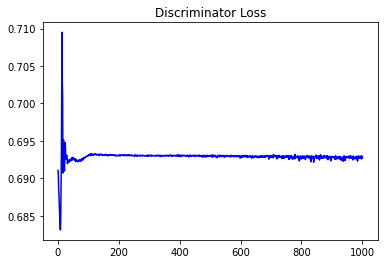

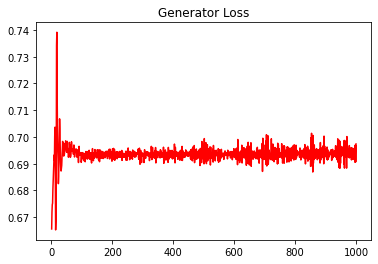

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.0788921308794456


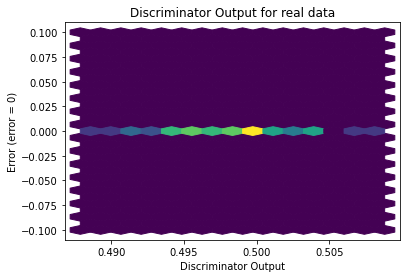

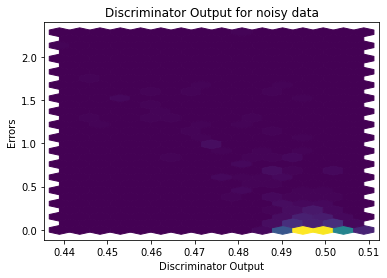

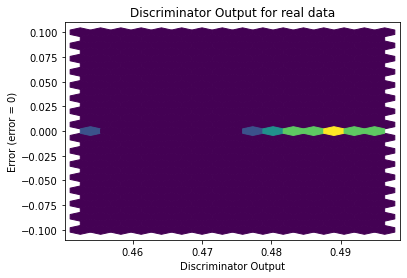

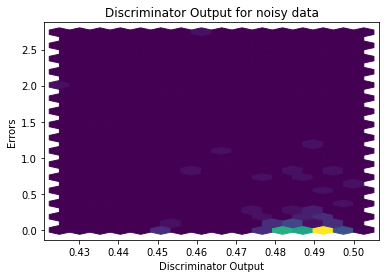

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


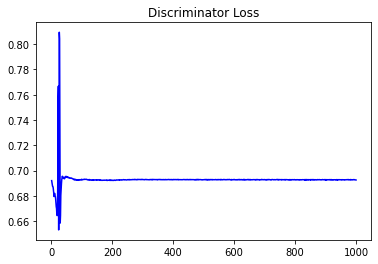

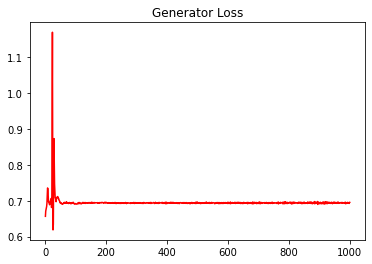

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.08498995487672469


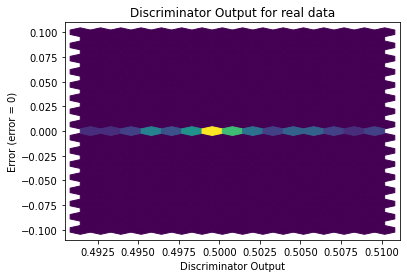

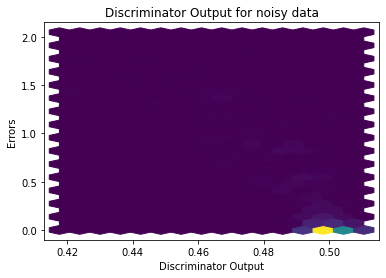

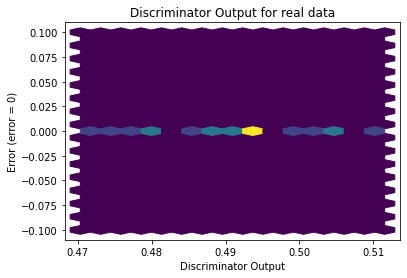

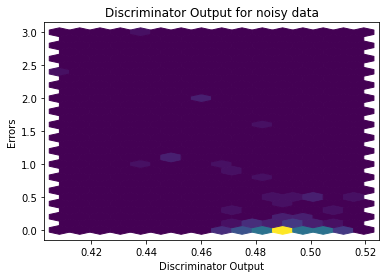

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.7201]], requires_grad=True)
